In [1]:
import sim
%pylab inline
#plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  34000
Omnirob is at [x,y,z]= [7.624996185302734, 8.547276496887207, 0.3544994294643402]
Disconnected


In [3]:
# Obstacles
def plot_cir(r):
    ax.add_patch(Circle(
        r[0],
        r[1],
        color=r[2]
    ))
    plot()

def plot_cell(r):
    ax.add_patch(Rectangle(
        r,
        1,
        1,
        facecolor='b'
    ))

In [4]:
# Define a class called Tree
class Tree:
    def __init__(self):
        self.data = None
        self.π = None

# Breadth First Search
def bfs(s,g):
    path_inv = []
    tree = []
    t = Tree()
    t.data = s
    tree.append(t)
    Q = [t]
    not_visited = V
    not_visited.remove(s)
    while len(Q) > 0:
        x = Q[0]
        Q.remove(x)
        if x.data == g:
            print('success')
            path_inv.append(x)
            while x.π:
                x = x.π
                path_inv.append(x)
        for x1 in adj(x.data):
            if x1 in not_visited:
                not_visited.remove(x1)
                t = Tree()
                t.data = x1
                t.π = x
                tree.append(t)
                Q.append(t)
    path = []
    for i in range(len(path_inv)-1,-1,-1):
        path.append(path_inv[i].data)
    return path

def adj(x):
    ret = []
    for e in E:
        if e[0] == x:
            ret.append(e[1])
        if e[1] == x:
            ret.append(e[0])
    return ret

In [5]:
# Obstacles info

cuboid0 = ((2.725,0),np.sqrt(4^2+1^2)/2,'k')
cuboid1 = ((7.425,4.725),np.sqrt(4^2+1^2)/2,'k')
cuboid3 = ((-1.025,-1.5),np.sqrt(4^2+1^2)/2,'k')
cuboid4 = ((-6.7,6.4),np.sqrt(4^2+1^2)/2,'k')
cuboid6 = ((-5.15,-6.2),np.sqrt(4^2+1^2)/2,'k')
cylinder10 = ((-1.775,2.1),1/2,'k')
cylinder11 = ((-5.8,-0.975),1/2,'k')
cylinder12 = ((7.275,-7.75),1/2,'k')
cylinder5 = ((2.425,4.075),1/2,'k')
cylinder6 = ((4.4,0.875),1/2,'k')
cylinder7 = ((2.825,-4.85),1/2,'k')
cylinder8 = ((-0.525,6.3),1/2,'k')
cylinder9 = ((-5.125,3.425),1/2,'k')

sphere9 = ((-7.425,-7.925),1.5/2,'g')
omnirob = ((7.625,8.55),0.1,'b')

rs = [cuboid0,cuboid1,cuboid3,cuboid4,cuboid6,cylinder10,cylinder11,cylinder12,cylinder5,cylinder6,cylinder7,cylinder8,cylinder9]

cs = [(-9,5),(-9,6),(-9,7),
      (-8,4),(-8,5),(-8,6),(-8,7),
      (-7,-8),(-7,-7),(-7,-6),(-7,-5),(-7,-2),(-7,-1),(-7,0),(-7,2),(-7,3),(-7,4),(-7,5),(-7,6),(-7,7),(-7,8),
      (-6,-8),(-6,-7),(-6,-6),(-6,-5),(-6,-2),(-6,-1),(-6,0),(-6,2),(-6,3),(-6,4),(-6,5),(-6,6),(-6,7),
      (-5,-8),(-5,-7),(-5,-6),(-5,-5),(-5,-2),(-5,-1),(-5,2),(-5,3),(-5,4),
      (-4,-8),(-4,-7),(-4,-6),
      (-3,-3),(-3,-2),(-3,-1),(-3,1),(-3,2),(-3,3),
      (-2,-4),(-2,-3),(-2,-2),(-2,-1),(-2,0),(-2,1),(-2,2),(-2,3),(-2,5),(-2,6),(-2,7),
      (-1,-4),(-1,-3),(-1,-2),(-1,-1),(-1,0),(-1,1),(-1,2),(-1,5),(-1,6),(-1,7),
      (0,-3),(0,-2),(0,-1),(0,5),(0,6),(0,7),
      (1,-6),(1,-5),(1,-2),(1,-1),(1,0),(1,1),(1,3),(1,4),
      (2,-6),(2,-5),(2,-4),(2,-2),(2,-1),(2,0),(2,1),(2,3),(2,4),(2,5),
      (3,-6),(3,-5),(3,-4),(3,-2),(3,-1),(3,0),(3,1),(3,3),(3,4),
      (4,-1),(4,0),(4,1),
      (5,0),(5,1),(5,3),(5,4),(5,5),
      (6,-9),(6,-8),(6,-7),(6,3),(6,4),(6,5),(6,6),
      (7,-9),(7,-8),(7,-7),(7,3),(7,4),(7,5),(7,6),
      (8,-9),(8,-8),(8,3),(8,4),(8,5),(8,6)
      ]

success


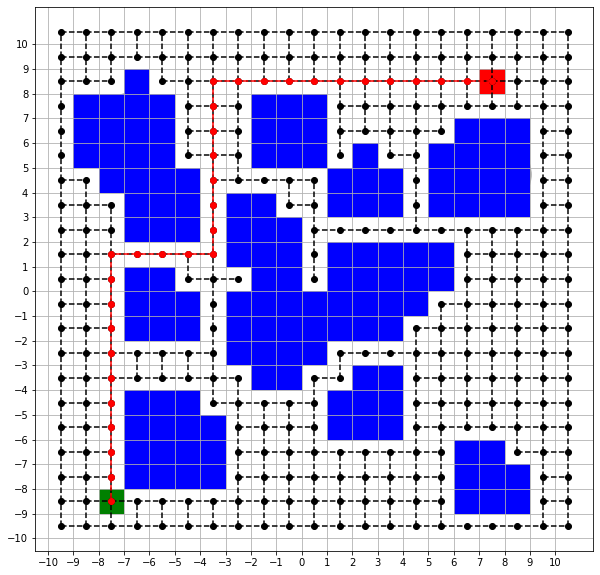

In [6]:
# Initialize the graph
fig = plt.figure()
ax = fig.gca()

# Plot obstacles
for r in rs:
    r_new = (r[0],r[1]+1/2,'gray')
    plot_cir(r_new)

for r in rs:
    plot_cir(r)
    
ax.add_patch(Rectangle(
        (7,8),
        1,
        1,
        facecolor='r'
    ))

ax.add_patch(Rectangle(
        (-8,-9),
        1,
        1,
        facecolor='g'
    ))

# Label cells
for c in cs:
    plot_cell(c)

# Store all vertices and edges
V = []
E = []

# Draw vertices and edges
for i in range(-10,11):
    for j in range(-10,11):
        if (i,j) in cs:
            continue
        plot(i+0.5,j+0.5,'o',color='k')
        V.append((i,j))
        if (not (i-1,j) in cs) and i > -10:
            plot([i-0.5,i+0.5],[j+0.5,j+0.5],'--',color='k')
            E.append(((i-1,j),(i,j)))
        if (not (i,j-1) in cs) and j > -10:
            plot([i+0.5,i+0.5],[j-0.5,j+0.5],'--',color='k')
            E.append(((i,j-1),(i,j)))

# BFS
traj = bfs((7,8),(-8,-9))
for i in range(0,len(traj)):
    plot(traj[i][0]+0.5,traj[i][1]+0.5,'o',color='r')
    if i > 0:
        plot([traj[i-1][0]+0.5,traj[i][0]+0.5],[traj[i-1][1]+0.5,traj[i][1]+0.5],'--',color='r')

# Draw grid
ax.set_xticks(numpy.arange(-10,11,1))
ax.set_yticks(numpy.arange(-10,11,1))
plt.grid()
plt.show()

In [7]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [8]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

theta_x = []
theta_y = []
dx = []
dy = []
div = 10
for i in range(1, len(traj)):
    Δx = traj[i][0] - traj[i-1][0]
    Δy = traj[i][1] - traj[i-1][1]
    for j in range(0,div):
        theta_x.append(traj[i-1][0] + j * Δx/div)
        theta_y.append(traj[i-1][1] + j * Δy/div)
        dx.append(Δx/div)
        dy.append(Δy/div)

for theta_xi, theta_yi, dxi, dyi in zip(theta_x, theta_y, dx, dy):
    point_traj = array([theta_xi, theta_yi])
    vel_traj = array([dxi, dyi])
    
    # Sensing
    r_position = r.get_position()
    robot_position = array([r_position[0], r_position[1]])
    
    # Trajectory tracker
    u = 10 * (point_traj - robot_position) + vel_traj
    
    vx, vy = u
    r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
    
    time.sleep(0.1)


r.send_motor_velocities([0, 0, 0, 0])
r.close_connection()

Robot connected
Connection closed
